# Yoga Pose Identification

## Downloading the Dataset

The dataset is taken from the Kaggle. 

In [2]:
! kaggle datasets download  shrutisaxena/yoga-pose-image-classification-dataset

!unzip /content/yoga-pose-image-classification-dataset.zip

 99% 993M/0.98G [00:28<00:00, 23.6MB/s]
100% 0.98G/0.98G [00:28<00:00, 36.4MB/s]


## Preprocessing Dataset

In this step, we basically load all the images from the dataset using OpenCV and convert them into numpy array. Then we will save all the images and respective labels(pose names).

Here I am using only 13 poses to train our model, because to train a model with all poses in the dataset (100+), we need huge systems with great specifications such as high GPU, RAM, etc..

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = 'dataset'

labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107
labels = labels[0:13] #len =13

In [62]:
train_images=[]
train_labels=[]

for i,folder in enumerate(labels):
    try:
        for image in os.listdir(data_path+'/'+folder):
            img = os.path.join(data_path+'/'+folder+'/'+image)
            img = cv2.imread(img)
            img = cv2.resize(img,(256,256))
            train_images.append(img)
            train_labels.append(i)
    except:
        print(i,folder,image,img)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels).astype('int64')

Lets see some of the images from our training data

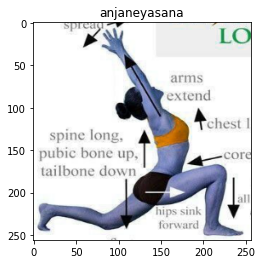

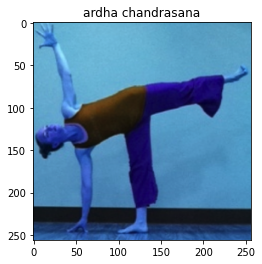

In [66]:
import matplotlib.pyplot as plt
for i in [300,400]:
    plt.imshow(train_images[i])
    plt.title(labels[train_labels[i]])
    plt.show()

In [70]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 13)

In [71]:
print(f'After preprocessing, our dataset has {train_images.shape[0]} images with shape {train_images.shape[1:]}')
print(f'After preprocessing, our dataset has {train_labels.shape[0]} rows with {train_labels.shape[1]} labels')


After preprocessing, our dataset has 728 images with shape (256, 256, 3)
After preprocessing, our dataset has 728 rows with 13 labels


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.1,shuffle=True)

In [73]:
print(f'After spiltting, shape of our train dataset: {X_train.shape}')
print(f'After spiltting, shape of our test dataset: {X_test.shape}')

After spiltting, shape of our train dataset: (655, 256, 256, 3)
After spiltting, shape of our test dataset: (73, 256, 256, 3)


In the above output, 655 is number of images, (256,256,3) is shape of an image i.e., width = 256, height = 256 and number of channels = 3 (R,G,B) 

# Build Model

In [72]:
import tensorflow.keras.backend  as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,\
            Dropout,Rescaling,Dense,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import load_model

In [35]:
K.clear_session()
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(256,256,3)),
            
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            Rescaling(1.0 / 255),
            
            Conv2D(32,(3,3),activation='relu'),
            MaxPooling2D((2,2)),  
            Dropout(0.3),

            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),    
            Dropout(0.3),
            
            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            
            Flatten(),
            Dense(512,activation='relu'),
            Dense(128,activation='relu'),    
            Dense(13,activation='softmax')
        
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
            )

In [37]:
history_model = model.fit(X_train, y_train,
          batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
17/17 [==============================] - 5s 126ms/step - loss: 4.6772 - accuracy: 0.0878 - val_loss: 2.5620 - val_accuracy: 0.1450
Epoch 2/20
17/17 [==============================] - 1s 77ms/step - loss: 2.5568 - accuracy: 0.1031 - val_loss: 2.5555 - val_accuracy: 0.1450
Epoch 3/20
17/17 [==============================] - 1s 77ms/step - loss: 2.5575 - accuracy: 0.1107 - val_loss: 2.5531 - val_accuracy: 0.1450
Epoch 4/20
17/17 [==============================] - 1s 78ms/step - loss: 2.5469 - accuracy: 0.1107 - val_loss: 2.5117 - val_accuracy: 0.2061
Epoch 5/20
17/17 [==============================] - 1s 77ms/step - loss: 2.4768 - accuracy: 0.1431 - val_loss: 2.3609 - val_accuracy: 0.1908
Epoch 6/20
17/17 [==============================] - 1s 77ms/step - loss: 2.2288 - accuracy: 0.2576 - val_loss: 2.2115 - val_accuracy: 0.2366
Epoch 7/20
17/17 [==============================] - 1s 78ms/step - loss: 2.1984 - accuracy: 0.3015 - val_loss: 2.0497 - val_accuracy: 0.4046
Epoch 8/20
1

In [44]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.9570459127426147
Test accuracy: 0.4794520437717438


In [45]:
model.save('model_13a.h5')

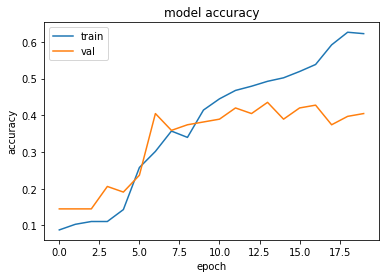

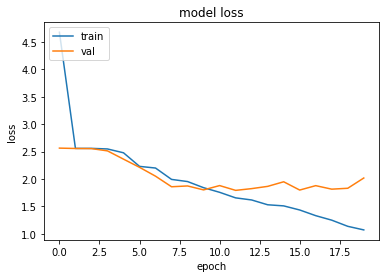

In [43]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Test our Model

11

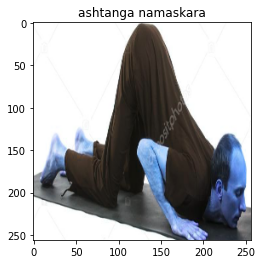

In [75]:
test_img = cv2.imread('dataset/ashtanga namaskara/21-0.png')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)

plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

# Using Transfer Learning to build a Model

Here, I have used VGG16 model.

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
vgg_model.trainable = False 

X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

In [27]:
from tensorflow.keras import layers, models

model_tl = tf.keras.models.Sequential([
    vgg_model,
    Flatten(),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(13, activation='softmax')
])

In [47]:

from tensorflow.keras.callbacks import EarlyStopping

model_tl.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


es = EarlyStopping(monitor='val_accuracy', mode='max', 
                    patience=5,  restore_best_weights=True)

history_model_tl = model_tl.fit(X_train, y_train, epochs=20, 
                                validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/20
17/17 [==============================] - 5s 258ms/step - loss: 1.2578 - accuracy: 0.8321 - val_loss: 0.9113 - val_accuracy: 0.8015
Epoch 2/20
17/17 [==============================] - 4s 249ms/step - loss: 0.8965 - accuracy: 0.8626 - val_loss: 1.0224 - val_accuracy: 0.8168
Epoch 3/20
17/17 [==============================] - 4s 252ms/step - loss: 0.5569 - accuracy: 0.8855 - val_loss: 0.7767 - val_accuracy: 0.8702
Epoch 4/20
17/17 [==============================] - 4s 252ms/step - loss: 0.3531 - accuracy: 0.9447 - val_loss: 0.9259 - val_accuracy: 0.8626
Epoch 5/20
17/17 [==============================] - 4s 254ms/step - loss: 0.2139 - accuracy: 0.9637 - val_loss: 0.9103 - val_accuracy: 0.8550
Epoch 6/20
17/17 [==============================] - 4s 258ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.8782 - val_accuracy: 0.9008
Epoch 7/20
17/17 [==============================] - 4s 252ms/step - loss: 0.0501 - accuracy: 0.9771 - val_loss: 0.9383 - val_accuracy: 0.8931
Epoch 

In [49]:
score_tl = model_tl.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_tl[0])
print("Test accuracy:", score_tl[1])

Test loss: 2.0712711811065674
Test accuracy: 0.7123287916183472


In [50]:
model_tl.save('model_13tl.h5')

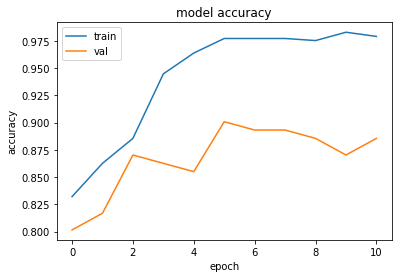

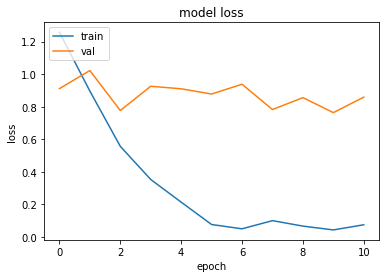

In [51]:
plt.plot(history_model_tl.history['accuracy'])
plt.plot(history_model_tl.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model_tl.history['loss'])
plt.plot(history_model_tl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Test our Model

12

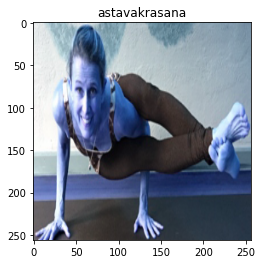

In [32]:
test_img = cv2.imread('/content/dataset/astavakrasana/10-0.png')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model_tl.predict(test_img)

plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)